In [127]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
''' [TODO] Figure properties. Specify the csv file and corresponding labels. '''
workload_list = [
# '502.gcc_r',
'505.mcf_r',
'520.omnetpp_r',
# '549.fotonik3d_r',
'pr.twi',
'resnet50',
'ycsb.a'
]
workload_dict = {item: item for item in workload_list}
workload_dict['pr.twi'] = 'pr.twi'
workload_dict['resnet50'] = 'resnet50'
workload_dict['ycsb.a'] = 'YCSB-A'
scheme_dict = {
    'Baryon': 'Baryon',
    'No Zero Block Opt': 'No Zero Block Opt',
    'Not Cacheline-aligned': 'Not Cacheline-aligned',
    'No Decomp Cost': 'No Decomp Cost',
    'Arbitrary CF Mixing': 'Arbitrary CF Mixing',
}

fig_title = 'Normalized Speedup'
fig_name = 'graph_compress'
fig_ylim = (0, 1.25)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.1, 0.25))
new_color = [
'#b3e2cd',
'#fdcdac',
'#cbd5e8',
'#f4cae4',
'#e6f5c9',
'#fff2ae',
'#f1e2cc',
'#cccccc',
]
baryon_color = new_color[2]
fig_bar_colors = easypyplot.color.color_scale(baryon_color, len(scheme_dict), low=0.7, high=1.0)
assert len(fig_bar_colors) == len(scheme_dict)

# pprint(fig_yticks)

In [129]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.75
fig_dims = (4, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [130]:
''' (Speedup) Load data from file. '''
csv_path = './1_performance/compression_speedup.csv'
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
fig_stage_xticks = []
fig_data_stage_2darr = []
xtick = 1
schemedict1 = [item for item in scheme_dict]
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in schemedict1):
                row_value.append(row[col])
        fig_data_stage_2darr.append(row_value)
        name = workload_dict[workload_fullname]
        if workload_fullname.endswith('_r'):
            name = name[:3]
        fig_xlabels.append(name)
        xtick += 1
        fig_stage_xticks.append(xtick)
assert len(fig_data_stage_2darr) == len(fig_xlabels) == len(fig_stage_xticks)
print(fig_data_stage_2darr)

[[1.0, 1.0, 0.3885, 1.0, 1.0242], [1.0, 0.9826, 0.7458, 1.0025, 1.0476], [1.0, 0.9497, 0.4573, 1.001, 1.0103], [1.0, 0.9896, 0.8112, 1.0019, 1.0001], [1.0, 0.9141, 0.6713, 1.008, 1.0207]]


In [131]:
''' (CF) Load data from file. '''
csv_path = './1_performance/compression_cf.csv'
csv_hd = pd.read_csv(csv_path, sep=',')
cf_xlabels = []
cf_stage_xticks = []
cf_data_2darr = []
xtick = 1
schemedict1 = [item for item in scheme_dict]
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in schemedict1):
                row_value.append(row[col])
        cf_data_2darr.append(row_value)
        name = workload_fullname
        if workload_fullname.endswith('_r'):
            name = name[:3]
        cf_xlabels.append(name)
        xtick += 1
        cf_stage_xticks.append(xtick)
assert len(cf_data_2darr) == len(cf_xlabels) == len(cf_stage_xticks)
print(cf_data_2darr)

[[2.17, 2.16, 2.68, 2.17, 2.74], [1.98, 1.98, 2.04, 1.98, 2.02], [1.35, 1.34, 1.47, 1.35, 1.43], [1.04, 1.0, 1.04, 1.04, 1.05], [2.0, 1.85, 2.15, 2.0, 2.48]]


[1.7, 1.8499999999999999, 1.9999999999999998, 2.1499999999999995, 2.3]
[2.7, 2.85, 3.0, 3.15, 3.3]
[3.7, 3.85, 4.0, 4.15, 4.3]
[4.7, 4.8500000000000005, 5.000000000000001, 5.150000000000001, 5.300000000000002]
[5.7, 5.8500000000000005, 6.000000000000001, 6.150000000000001, 6.300000000000002]


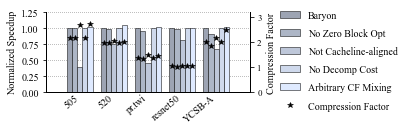

In [132]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.add_subplot(1, 1, 1)
cf_ax = ax.twinx()
easypyplot.format.turn_off_box(ax, twinx_axes=cf_ax)
h = easypyplot.barchart.draw(
    ax, fig_data_stage_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=fig_xlabels,
    xticks=fig_stage_xticks,
    # xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40, # Uncomment this for rotated x tick labels
    prop=ft, # Uncomment if easypyplot supports font
    colors=fig_bar_colors)

cf_hdls = []
scheme_num = len(scheme_dict)
for group_id in range(len(workload_dict)):
    gap = 1.0 * fig_bar_width / scheme_num
    layout_xticks = list(np.arange(fig_stage_xticks[group_id] - gap * scheme_num / 2 + gap / 2, fig_stage_xticks[group_id] + gap * scheme_num / 2, gap))
#     layout_xticks = [fig_stage_xticks[group_id] - gap, fig_stage_xticks[group_id], fig_stage_xticks[group_id] + gap]
    print(layout_xticks)
    cf_hdls += cf_ax.plot(layout_xticks, cf_data_2darr[group_id],
                marker='*',
                linewidth = '0.0',
                color = '#000000',
                markersize = '6.0',
                # prop = ft
                )

''' x axis '''
ax.xaxis.set_tick_params(pad=-3)
fig_xticks_fix = [item for item in fig_stage_xticks]
# fig_xticks_fix[0] -= 0.2
ax.set_xticks(fig_xticks_fix)
ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)
''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
str_yticks = ['%.2f' % item for item in fig_yticks]
ax.set_yticklabels(str_yticks, fontsize=fig_label_fontsize, fontproperties=ft)
ax.set_ylabel(fig_title, multialignment='center', fontsize=fig_label_fontsize, fontproperties=ft)

''' twin-axis '''
cf_ylim = (0, 3.2)
cf_ax.set_ylim(cf_ylim)
cf_ax.set_ylabel('Compression Factor', fontsize=fig_label_fontsize, fontproperties=ft)

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper left', bbox_to_anchor=(0.95, 0.98), columnspacing=3.9, labelspacing=0.8,
        ncol=1, frameon=False, prop=ft)
fig.legend(cf_hdls, ['Compression Factor'], loc='upper left', bbox_to_anchor=(0.95, 0.35), columnspacing=3.9, labelspacing=0.8,
        numpoints = 1,
        ncol=1, frameon=False, prop=ft)
# h_1 = [h[0], h[1], h[2]]
# legend_1 = [legend[0], legend[1], legend[2]]
# fig.legend(h_1, legend_1, loc='upper left', bbox_to_anchor=(0.05, 1.28), columnspacing=3.9,
#         ncol=3, frameon=False, prop=ft)
# h_2 = [h[3], h[4]]
# legend_2 = [legend[3], legend[4]]
# # fig.text(0.05, 0.97, 'Baryon +', fontsize=fig_label_fontsize, fontproperties=ft)
# fig.legend(h_2, legend_2, loc='upper left', bbox_to_anchor=(0.05, 1.13),
#         ncol=2, frameon=False, prop=ft)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.9)

In [133]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures